In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
muestra=[163, 171, 171, 167, 164, 160, 153, 176, 162, 171, 166, 164, 169, 160, 151, 155, 156, 147, 162, 170, 164, 160, 158, 159, 157, 159, 156, 162, 159, 174]
# Creamos el Dataframe
dataframe = pd.DataFrame(muestra)
dataframe.describe()

,0
count,30.000000
mean,162.200000
std,6.890273
min,147.000000
25%,158.250000
50%,162.000000
75%,166.750000
max,176.000000


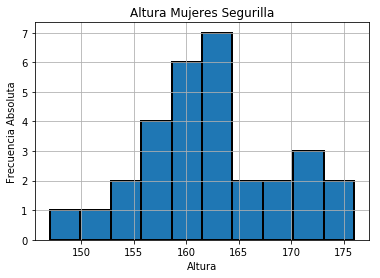

In [6]:
plt.title('Altura Mujeres Segurilla')
plt.xlabel("Altura",fontsize=10)
plt.ylabel("Frecuencia Absoluta",fontsize=10)
plt.hist(muestra, bins=10, alpha=1, edgecolor = 'black',  linewidth=2)
plt.grid(True)
plt.show()

In [4]:
def intervalo_confianza(data):
    media = data.mean()
    desviacion = data.std()
    error = desviacion/np.sqrt(data.iloc[:,0].size)
    limite_inferior = media - error
    limite_superior = media + error
    return media,desviacion,error,limite_inferior,limite_superior

In [5]:
intervalo_confianza(dataframe)

(0    162.2
 dtype: float64, 0    6.890273
 dtype: float64, 0    1.257986
 dtype: float64, 0    160.942014
 dtype: float64, 0    163.457986
 dtype: float64)

In [8]:
# Distribucion Normal loc=12 (media 12) y scale=10 (es decir varianza 10)
X = st.norm(loc=12.0, scale=10.0) 
dataframeejer1 = pd.DataFrame(X.rvs(size=10000).reshape(100,100))
dataframeejer1

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,28.550479,19.660888,9.025211,-1.227268,23.870465,26.626253,18.903767,23.438605,9.615067,14.146502,...,5.799082,1.832988,1.256748,12.628108,20.099704,17.788551,11.618706,17.911925,33.067668,23.199104
1,-1.681745,6.747490,7.466267,37.282795,21.116206,8.431144,3.715881,-0.755273,12.630496,19.374478,...,21.487836,18.481814,8.226100,16.340870,6.941021,13.046846,23.497718,-4.271590,13.485649,8.530373
2,26.105096,5.861340,6.030073,8.112441,10.680350,16.123380,16.174403,4.584443,10.718546,25.077956,...,-0.990077,4.488982,-5.468416,-0.476388,8.717606,24.332576,13.204168,-1.936038,11.440988,-2.179670
3,2.418217,10.549825,20.012058,6.212859,16.313588,-16.178763,4.715716,5.443860,8.622747,20.194046,...,18.674546,6.206533,14.868326,-6.563600,0.968756,23.222726,-0.161712,2.331394,19.257455,11.830153
4,-5.043892,6.859296,-11.260932,12.637003,18.986080,19.178033,32.716495,7.484329,1.999331,13.747779,...,10.389707,5.155642,9.754075,15.011700,18.668508,34.715244,10.878676,-9.295155,11.001807,20.165715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.410706,17.102610,16.517939,16.033788,0.344852,4.525148,23.116586,12.171004,7.286807,16.619415,...,-2.892296,0.753531,1.599807,31.325540,4.899999,7.827353,14.354582,10.813363,18.184897,19.110666
96,4.022893,10.589902,11.820290,-3.461854,22.900817,3.452437,7.796261,0.335996,10.652971,7.550166,...,13.399245,5.553554,6.820527,12.485232,18.746852,0.122433,19.001995,0.161486,-12.198051,28.774012
97,14.821641,22.603536,24.235425,18.609229,32.705671,2.197139,26.067722,10.354630,-8.336430,17.657751,...,4.565394,25.145628,29.968170,25.992103,-4.463841,22.879264,-9.453513,12.924557,7.557704,11.636003
98,15.273119,9.818734,14.003479,16.258585,10.390915,27.954476,6.459527,2.196132,11.564180,0.696818,...,-12.051084,8.507966,15.085399,2.712944,5.205142,10.008747,12.271036,12.411917,12.788386,1.483933


In [32]:
def intervalo_confianza_media(data, sigma=1.0, alpha=0.05): # alpha es el nivel de confianza(95%) y sigma es la desviacion tipica
    media = data.mean()
    # Error maximo admisible (alpha/2)
    h = st.norm.ppf(1.0-(alpha/2.)) * (sigma / np.sqrt(data.size))
    print ("Valor de h:",h)
    #devuelve media , media-h limite inferior, media+h limite superior
    return media, media-h, media+h

In [33]:
a = dataframeejer1.iloc[:,0]
a
intervalo_confianza_media(a,sigma=10.0)

Valor de h: 1.959963984540054


(10.397654243363563, 8.437690258823508, 12.357618227903618)